In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
modelnames = ['Complex_ACG','MACG','SingularWishart']
df = pd.DataFrame()
for k in [1,4]:
    for modelname in modelnames:
        df_tmp = pd.read_csv('../data/results/116_results/realdata_'+modelname+'_K='+str(k)+'.csv')
        df = pd.concat([df,df_tmp])

/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

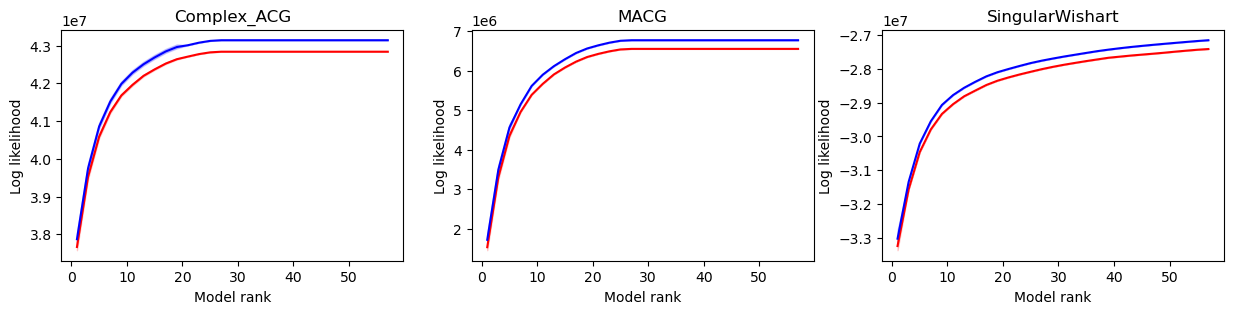

In [14]:
# make a 1x3 subplot of test_loglik and train_loglik over model rank for each modelname
fig, ax = plt.subplots(1,3,figsize=(15,3))
for k in [1]:
    for i,modelname in enumerate(modelnames):
        df_tmp = df[df['modelname']==modelname]
        df_tmp = df_tmp[df_tmp['K']==k]
        sns.lineplot(x='rank',y='test_loglik',data=df[df['modelname']==modelname],ax=ax[i],color='red')
        sns.lineplot(x='rank',y='train_loglik',data=df[df['modelname']==modelname],ax=ax[i],color='blue')
        ax[i].set_title(modelname)
        ax[i].set_ylabel('Log likelihood')
        ax[i].set_xlabel('Model rank')